In [1]:
import lvmnebular
import numpy as np

In [2]:
u=lvmnebular.simulation()
u.loadsim('Bubble_v2_5e-14',900) #native simulation
#u.loadsim('Bubble_v2_5e-14',900, vorbin=True) #voronoi simulation

Loading simulation: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14

Loading simfile: /home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/outputs/Bubble_v2_5e-14_linear_full_900_flux.fits
no.of bins: 169


In [3]:
u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, rbinmax=260, drbin=15, loadfile=False, plot=False) #native sim

#u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7320, 7330, 7331, 6731, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=True, rbinmax=260, drbin=15, loadfile=True, plot=False) #voronoi sim

Fitting Emmission Lines: ['9069' '7319' '7320' '7330' '7331' '6731' '6717' '6584' '6563' '6548'
 '6312' '5755' '5007' '4959' '4861' '4363' '4069' '4076' '3970' '3729'
 '3726']
linefitfile: Bubble_v2_5e-14/Bubble_v2_5e-14_linefits.fits
169
Fitting Line: 9069.60501855587
Fitting Line: 7319.488271122552
Fitting Line: 7320.488337835371
Fitting Line: 7330.489004963561
Fitting Line: 7331.48907167638
Fitting Line: 6731.449043984956
Fitting Line: 6717.44811000549
Fitting Line: 6584.439237200558
Fitting Line: 6563.437836231357
Fitting Line: 6548.436835539072
Fitting Line: 6312.421091313779
Fitting Line: 5755.383932273573
Fitting Line: 5007.334031084932
Fitting Line: 4959.330828869618
Fitting Line: 4861.324291013352
Fitting Line: 4363.29106802947
Fitting Line: 4069.2714544606724
Fitting Line: 4076.271921450406
Fitting Line: 3970.264849891588
Fitting Line: 3729.248772102199
Fitting Line: 3726.248571963742
Fitting Line: 9069.60501855587
Fitting Line: 7319.488271122552
Fitting Line: 7320.4883378353

16


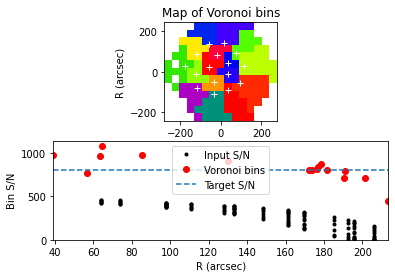

In [5]:
u.voronoibin(target_sn=800, lineid='5007') #Caution: run once after fitting lines in native simulation

In [9]:
u.runpyneb(niter=3, pertsim=False)

warng _ManageAtomicData: rec data not available for Al2
warng _ManageAtomicData: rec data not available for Ar2
warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: rec data not available for Ar4
warng _ManageAtomicData: rec data not available for Ar5
warng _ManageAtomicData: rec data not available for Ba2
warng _ManageAtomicData: rec data not available for Ba4
ERROR None: No data for this case B
ERROR None: No data for this case B
warng _ManageAtomicData: rec data not available for Ca5
warng _ManageAtomicData: rec data not available for Cl2
warng _ManageAtomicData: rec data not available for Cl3
warng _ManageAtomicData: rec data not available for Cl4
warng _ManageAtomicData: rec data not available for Fe3
warng _ManageAtomicData: rec data not available for K4
warng _ManageAtomicData: rec data not available for K5
warng _ManageAtomicData: rec data not available for Mg5
warng _ManageAtomicData: rec data not available for Mg7
ERROR None: No data for this case 

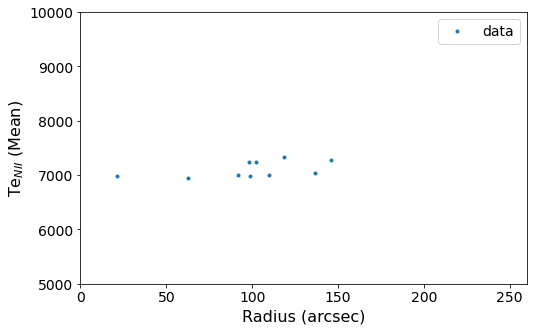

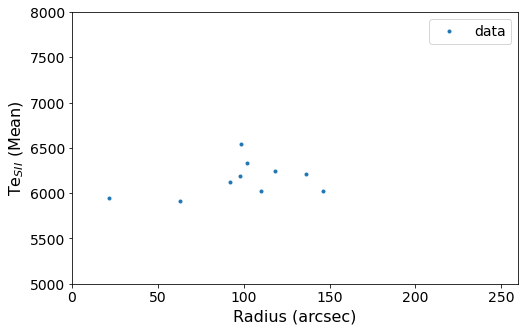

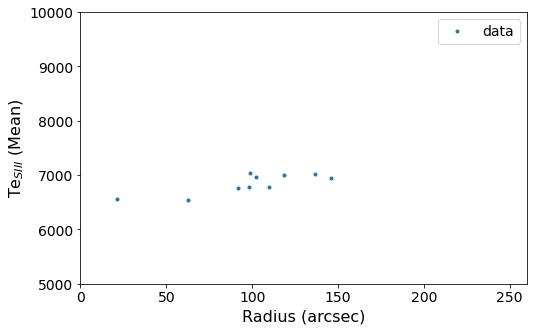

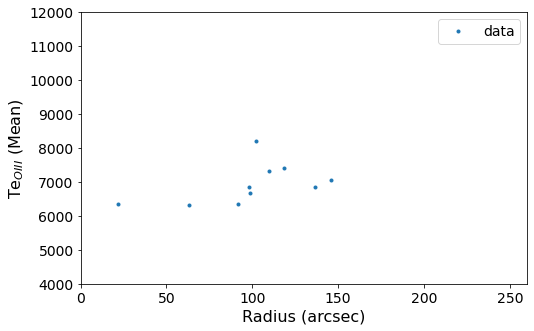

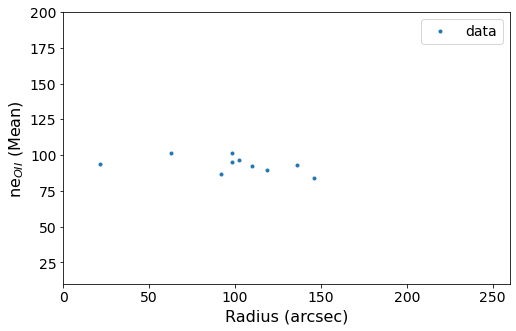

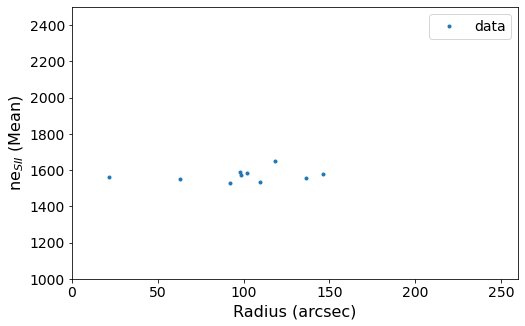

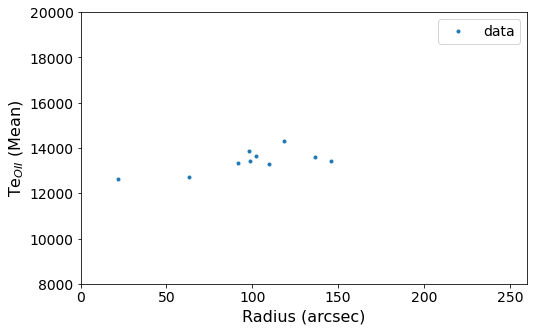

In [10]:
u.plotprofile(u.linefitdict['TeN2'], 5000 , 10000, title=r'Te$_{NII}$ (Mean)', output='TeN2', radbin=False, vorbin=True)
u.plotprofile(u.linefitdict['TeS2'], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=False, vorbin=True)

u.plotprofile(u.linefitdict['TeS3'], 5000 , 10000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',radbin=False, vorbin=True)
u.plotprofile(u.linefitdict['TeO3'], 4000 , 12000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=False, vorbin=True)
u.plotprofile(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=False, vorbin=True)

u.plotprofile(u.linefitdict['neS2'], 1000 , 2500, title=r'ne$_{SII}$ (Mean)', output='neS2',  radbin=False, vorbin=True)
u.plotprofile(u.linefitdict['TeO2'], 8000 , 20000, title=r'Te$_{OII}$ (Mean)', output='TeO2', radbin=False, vorbin=True)



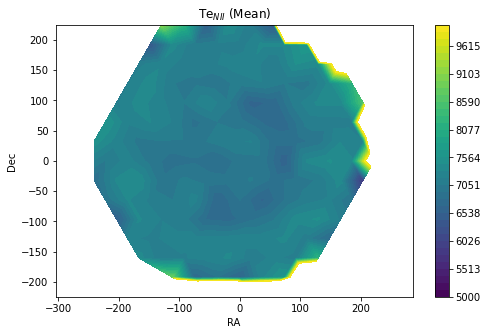

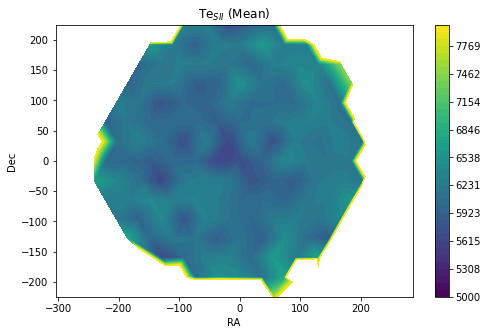

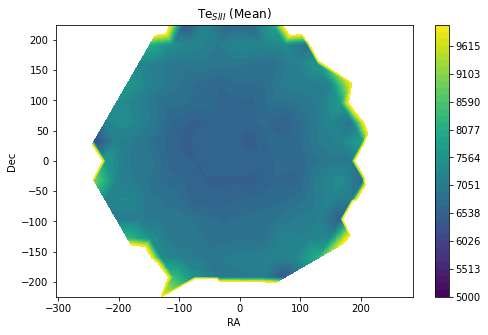

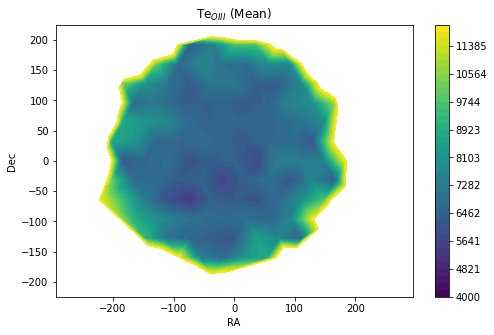

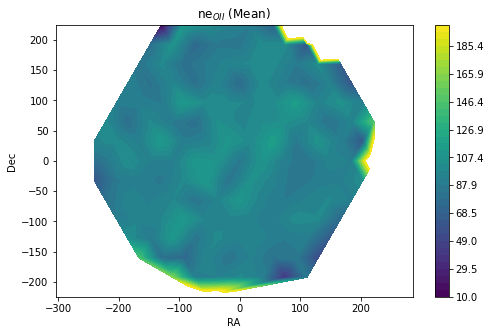

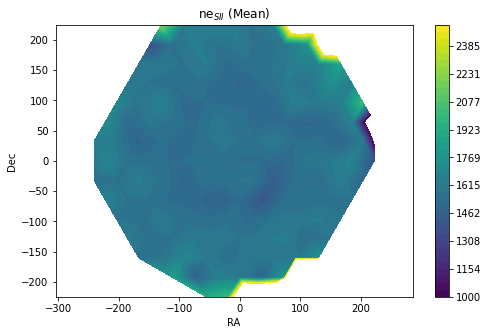

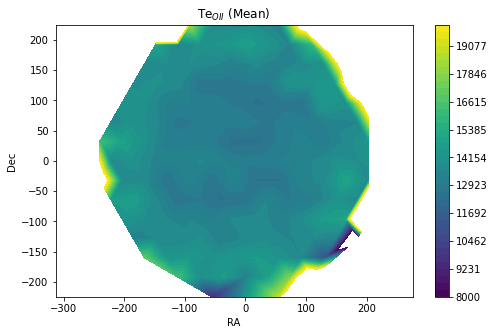

In [8]:
u.plotmap(u.linefitdict['TeN2'], 5000 , 10000, title=r'Te$_{NII}$ (Mean)', output='TeN2', vorbin=False)
u.plotmap(u.linefitdict['TeS2'], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  vorbin=False)
u.plotmap(u.linefitdict['TeS3'], 5000 , 10000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',vorbin=False)
u.plotmap(u.linefitdict['TeO3'], 4000 , 12000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',vorbin=False)
u.plotmap(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     vorbin=False)
u.plotmap(u.linefitdict['neS2'], 1000 , 2500, title=r'ne$_{SII}$ (Mean)', output='neS2',  vorbin=False)
u.plotmap(u.linefitdict['TeO2'], 8000 , 20000, title=r'Te$_{OII}$ (Mean)', output='TeO2', vorbin=False)




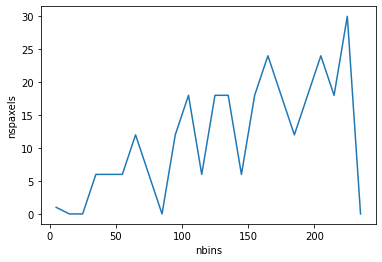

In [9]:
u.radialbin(250, 10)

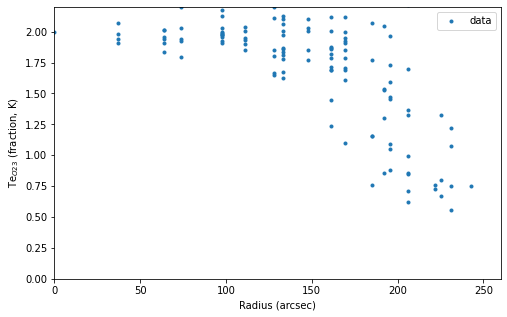

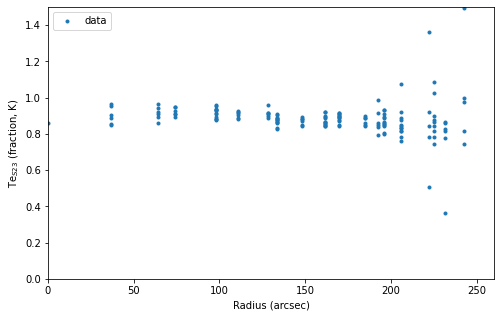

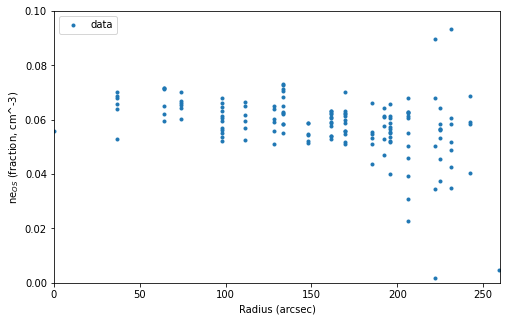

In [10]:
u.plotprofile(np.divide(u.linefitdict['TeO2'], u.linefitdict['TeO3']), 0, 2.2, title=r'Te$_{O23}$ (fraction, K)', output='TeO23 frac',    vorbin=False)
u.plotprofile(np.divide(u.linefitdict['TeS2'], u.linefitdict['TeS3']), 0, 1.5, title=r'Te$_{S23}$ (fraction, K)', output='TeS23 frac',    vorbin=False)
u.plotprofile(np.divide(u.linefitdict['neO2'], u.linefitdict['neS2']), 0, 0.1, title=r'ne$_{OS}$ (fraction, cm^-3)', output='TeOS2 frac', vorbin=False)

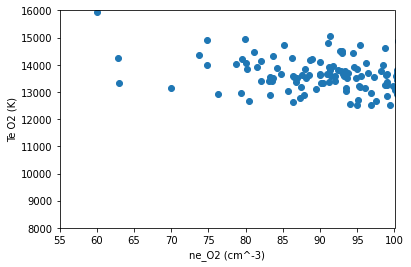

In [11]:
import matplotlib.pyplot as plt
plt.scatter(u.linefitdict['neO2'], u.linefitdict['TeO2'])
plt.xlabel('ne_O2 (cm^-3)')
plt.ylabel('Te O2 (K)')
plt.ylim(8000, 16000)
plt.xlim(55, 100)
title='Te vs ne for OII.png'
plt.savefig(u.simname+'/'+u.simname+'_plotprofile/'+title, dpi=300)

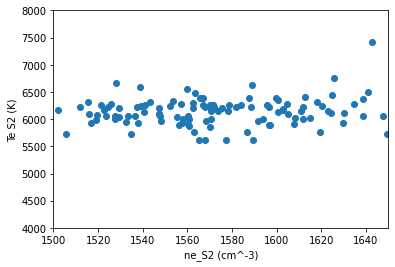

In [12]:
import matplotlib.pyplot as plt
plt.scatter(u.linefitdict['neS2'], u.linefitdict['TeS2'])
plt.xlabel('ne_S2 (cm^-3)')
plt.ylabel('Te S2 (K)')
plt.ylim(4000, 8000)
plt.xlim(1500, 1650)
title='Te vs ne for SII.png'
plt.savefig(u.datadir+u.simname+'/'+u.simname+'_plotprofile/'+title, dpi=300)